In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from markowitz.data import ingest, preprocess
from markowitz.simulate import scenarios, efficient_frontier

In [2]:
sd = "2016-01-01"
ed = "2020-12-31"
#tickers = ["RGAGX", "TISCX", "VBTIX", "VTIFX"]
exp_ratio = {
    'VBMPX':0.03,
    'VTIFX':0.07,
    'VMFXX':0.11,
    'VIIIX':0.02,
    'VSMPX':0.02,
    'VEXRX':0.34,
    'VTPSX':0.07,
    'VGSNX':0.1
}
tickers = exp_ratio.keys()

data = ingest(tickers, sd, ed)
df = preprocess(data, tickers)

[*********************100%***********************]  8 of 8 completed


In [3]:
rdf = scenarios(df, tickers, exp_ratio, nscenarios=200, ndays=365)
rdf.head()

,VBMPX,VTIFX,VMFXX,VIIIX,VSMPX,VEXRX,VTPSX,VGSNX
0,-0.004396,0.010315,-0.0011,0.387936,0.458876,0.448824,0.387286,0.266098
1,-0.025352,-0.005933,-0.0011,0.149387,0.160961,0.028512,0.080313,-0.261742
2,-0.004061,0.064950,-0.0011,0.409816,0.440886,0.371751,0.159474,0.024292
3,0.002796,-0.003435,-0.0011,0.171392,0.225061,0.241606,0.037575,-0.131888
4,0.039813,0.021636,-0.0011,0.050720,0.058333,-0.070352,-0.129963,0.019372


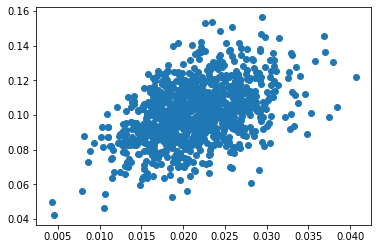

In [4]:
n, a = efficient_frontier(tickers, rdf)
plt.scatter(n,a)

(-1.0, 1.5)

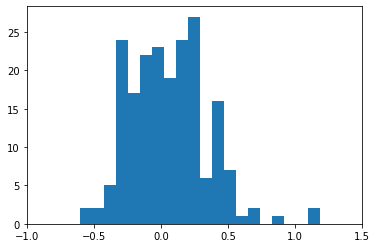

In [5]:
fund="VGSNX"
_, _, _ = plt.hist(rdf[fund], bins=20)
plt.xlim([-1,1.5])

(-1.0, 1.5)

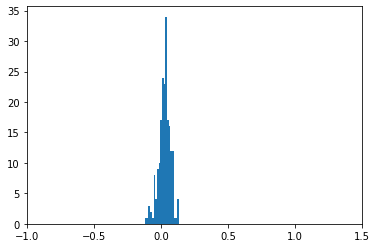

In [6]:
fund="VBMPX"
_, _, _ = plt.hist(rdf[fund], bins=20)
plt.xlim([-1,1.5])

(-1.0, 1.5)

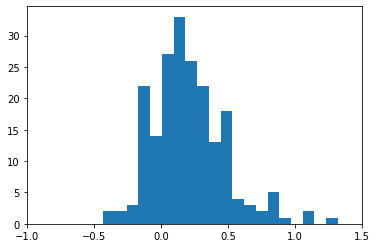

In [7]:
fund="VSMPX"
_, _, _ = plt.hist(rdf[fund], bins=20)
plt.xlim([-1,1.5])